In [22]:
import csv
from collections import OrderedDict

import pandas as pd

In [31]:
# with open("./data/wavedata3.csv", encoding="utf-8-sig") as csvfile:
#     reader = csv.DictReader(csvfile)
#     for row in reader:
#         print(row)

In [44]:
with open("./data/wavedata3.csv", mode="r", encoding="utf-8-sig") as csvfile:
    reader = csv.reader(csvfile)
    data = []
    index = []
    for rows in reader:
        dic = OrderedDict()
        for i in range(0, len(rows), 2):
            try:
                dic[rows[i]] = float(rows[i + 1])
            except ValueError:
                dic[rows[i]] = rows[i + 1]
        data.append(dic)

In [45]:
print(data)

[OrderedDict([('condition', 'vih1'), ('rate', '250ps'), ('pin', 'p1'), ('tr', 41.0), ('tf', 44.0), ('duty', 51.0)]), OrderedDict([('condition', 'vih1'), ('rate', '286ps'), ('pin', 'p1'), ('tr', 42.0), ('tf', 44.0), ('duty', 52.0)]), OrderedDict([('condition', 'vih1'), ('rate', '333ps'), ('pin', 'p1'), ('tr', 43.0), ('tf', 45.0), ('duty', 51.0)]), OrderedDict([('condition', 'vih2'), ('rate', '250ps'), ('pin', 'p1'), ('tr', 44.0), ('tf', 45.0), ('duty', 43.0)]), OrderedDict([('condition', 'vih2'), ('rate', '286ps'), ('pin', 'p1'), ('tr', 44.0), ('tf', 55.0), ('duty', 43.0)]), OrderedDict([('condition', 'vih2'), ('rate', '333ps'), ('pin', '1p'), ('tr', 44.0), ('tf', 55.0), ('duty', 43.0)])]


In [46]:
df = pd.DataFrame(data)

In [47]:
df

,condition,rate,pin,tr,tf,duty
0,vih1,250ps,p1,41.0,44.0,51.0
1,vih1,286ps,p1,42.0,44.0,52.0
2,vih1,333ps,p1,43.0,45.0,51.0
3,vih2,250ps,p1,44.0,45.0,43.0
4,vih2,286ps,p1,44.0,55.0,43.0
5,vih2,333ps,1p,44.0,55.0,43.0


In [48]:
df = df.set_index("condition")

In [60]:
df["pin-rate"] = df["pin"] + "-" + df["rate"]

In [62]:
df

,rate,pin,tr,tf,duty,pin-rate
condition,,,,,,
vih1,250ps,p1,41.0,44.0,51.0,p1-250ps
vih1,286ps,p1,42.0,44.0,52.0,p1-286ps
vih1,333ps,p1,43.0,45.0,51.0,p1-333ps
vih2,250ps,p1,44.0,45.0,43.0,p1-250ps
vih2,286ps,p1,44.0,55.0,43.0,p1-286ps
vih2,333ps,1p,44.0,55.0,43.0,1p-333ps


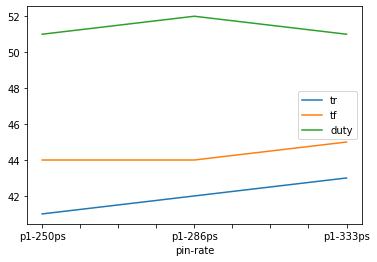

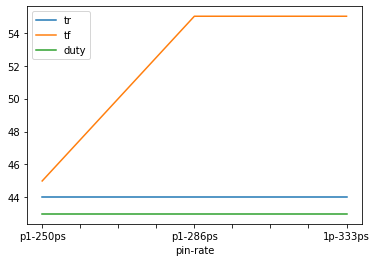

In [64]:
for name, group in df.groupby(["condition"]):
    group = group.set_index("pin-rate")

    group.plot()

<AxesSubplot:xlabel='condition'>

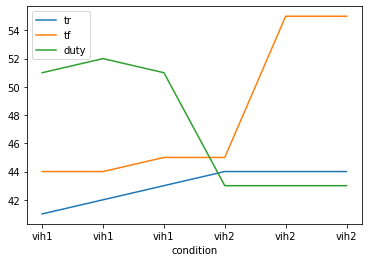

In [57]:
df.plot()]
